In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
#import datetime as datetime
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset.csv',sep=',')
dataset.head()
from sklearn.preprocessing import MinMaxScaler


def getStdDate(x):
    dt_list = x.split('/')
    #dt_str = "0"+dt_list[0]+"/"+"0"+dt_list[1]+"/"+dt_list[2]
    dt_str = dt_list[2]+"-"+"0"+dt_list[0]+"-"+dt_list[1]
    datetime_object = dt.datetime.strptime(dt_str,'%Y-%m-%d')
    return datetime_object

dataset['creationdate'] = dataset['creationdate'].apply(lambda x : getStdDate(x))
today= dt.datetime.today().strftime('%Y-%m-%d')
today= pd.to_datetime(today)

dataset['recency'] = dataset['creationdate'].apply(lambda x:(1/(today-x).days)*100)

In [ ]:
bin_count = dataset['bin'].value_counts()
bin_count_pdf = bin_count.to_frame()
bin_count_pdf['count_of_txn'] = bin_count_pdf['bin']
bin_count_pdf['bin'] = bin_count_pdf.index
bin_count_pdf.sort_values(by='bin').head()

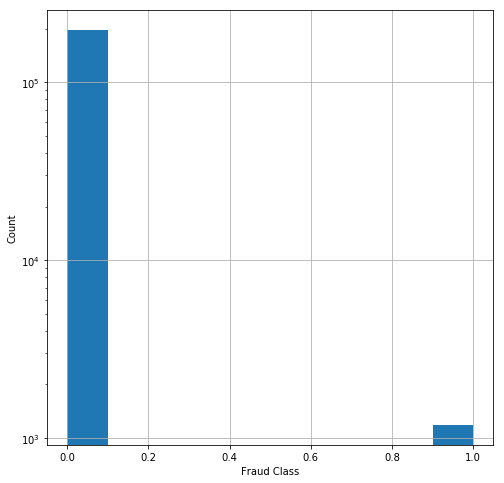

In [12]:
plt.figure(figsize=(8,8))
plt.xlabel("Fraud Class")
plt.ylabel("Count")
plt.grid(True)
plt.hist(dataset['fraud'],log=True)
plt.show()

In [ ]:
dataset_sub = dataset[['bin','fraud']]
dataset_sub_pdf = dataset_sub.groupby(["bin"]).sum().reset_index()
dataset_sub_pdf.sort_values(by='bin').head()

In [ ]:
bin_fraud_pdf = bin_count_pdf.merge(dataset_sub_pdf, left_on='bin', right_on='bin', how='inner')
bin_fraud_pdf.shape

In [ ]:
bin_fraud_pdf['pc_fraud']=bin_fraud_pdf['fraud']/bin_fraud_pdf['count_of_txn']
bin_fraud_pdf.sort_values(by='pc_fraud').head(5)

In [ ]:
bin_fraud_pdf= bin_fraud_pdf.rename(columns={"fraud": "fraud_count"})
bin_fraud_pdf.head(5)

In [ ]:
dataset = dataset.merge(bin_fraud_pdf, left_on='bin', right_on='bin', how='inner')
dataset = dataset.drop_duplicates()
print("Shape after join ",dataset.shape)

#drop_list = ['creationdate','bin','count_of_txn','fraud_count']
drop_list = ['creationdate','bin','fraud_refusal','declined','count_of_txn','fraud_count']
dataset = dataset.drop(drop_list,axis=1)

y_col = 'fraud'
X = dataset.drop(y_col,axis=1)
dataset['amount'] = dataset['amount'].apply(lambda x : np.log(x+1))
y = dataset['fraud']
dataset.head()

In [ ]:
# vc_list = ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_7', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_47', 'rule_49', 'rule_50', 'rule_51', 'rule_52', 'rule_63', 'rule_66', 'rule_74', 'rule_77']
# chi2_list = ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
# f_classify_list = ['amount', 'fraud_refusal', 'declined', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
# mir_list = ['rule_7', 'rule_13', 'rule_25', 'rule_28', 'rule_30', 'rule_34', 'rule_35', 'rule_37', 'rule_39', 'rule_49', 'rule_52', 'rule_54', 'rule_56', 'rule_68', 'rule_77']

vc_list = ['amount', 'rule_3', 'rule_4', 'rule_7', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_47', 'rule_49', 'rule_50', 'rule_51', 'rule_52', 'rule_63', 'rule_66', 'rule_74', 'rule_77']
chi2_list = ['amount', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
f_classify_list = ['amount', 'rule_3', 'rule_4', 'rule_8', 'rule_9', 'rule_11', 'rule_22', 'rule_26', 'rule_49', 'rule_55', 'rule_63', 'rule_64', 'rule_74']
mir_list = ['rule_7', 'rule_13', 'rule_25', 'rule_28', 'rule_30', 'rule_34', 'rule_35', 'rule_37', 'rule_39', 'rule_49', 'rule_52', 'rule_54', 'rule_56', 'rule_68', 'rule_77']


var_sel = []
var_sel = var_sel+vc_list
var_sel = var_sel+chi2_list
var_sel = var_sel+f_classify_list
var_sel = var_sel+mir_list

X = X[ X.columns.intersection(var_sel)]
y = y

# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)


scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# scaler = Normalizer().fit(X)
# X = scaler.transform(X)

target_names = ['0','1']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(10,10))
colors = ['navy', 'red']
lw = 2
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Fraud dataset')

plt.show()

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_r,y,train_size=0.75,test_size=0.25)

tpot = TPOTClassifier(generations=5,population_size=50,verbosity=2,scoring='f1_weighted',n_jobs=48)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_fraud_pca.py')


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

print(__doc__)


def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1


# # Generate the dataset
# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.3, 0.7],
#                            n_informative=3, n_redundant=1, flip_y=0,
#                            n_features=20, n_clusters_per_class=1,
#                            n_samples=80, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply regular SMOTE
#kind = ['regular', 'borderline1', 'borderline2', 'svm']
kind = ['regular']

sm = [SMOTE(kind=k) for k in kind]
X_resampled = []
y_resampled = []
X_res_vis = []
for method in sm:
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))

plt.figure(figsize=(10,10))
# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')
for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler


# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply the random over-sampling
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately

f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')


ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])



plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection as ms
from sklearn import datasets, metrics, tree

from imblearn import over_sampling as os
from imblearn import pipeline as pl

print(__doc__)

RANDOM_STATE = 42

scorer = metrics.make_scorer(metrics.cohen_kappa_score)

# # Generate the dataset
# X, y = datasets.make_classification(n_classes=2, class_sep=2,
#                                     weights=[0.1, 0.9], n_informative=10,
#                                     n_redundant=1, flip_y=0, n_features=20,
#                                     n_clusters_per_class=4, n_samples=5000,
#                                     random_state=RANDOM_STATE)
smote = os.SMOTE(random_state=RANDOM_STATE)
cart = tree.DecisionTreeClassifier(random_state=RANDOM_STATE)
pipeline = pl.make_pipeline(smote, cart)

param_range = range(1, 11)
train_scores, test_scores = ms.validation_curve(
    pipeline, X, y, param_name="smote__k_neighbors", param_range=param_range,
    cv=3, scoring=scorer, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(param_range, test_scores_mean, label='SMOTE')
ax.fill_between(param_range, test_scores_mean + test_scores_std,
                test_scores_mean - test_scores_std, alpha=0.2)
idx_max = np.argmax(test_scores_mean)
plt.scatter(param_range[idx_max], test_scores_mean[idx_max],
            label=r'Cohen Kappa: ${0:.2f}\pm{1:.2f}$'.format(
                test_scores_mean[idx_max], test_scores_std[idx_max]))

plt.title("Validation Curve with SMOTE-CART")
plt.xlabel("k_neighbors")
plt.ylabel("Cohen's kappa")

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim([1, 10])
plt.ylim([0.0, 1.0])

plt.legend(loc="best")
plt.show()

In [ ]:
from collections import Counter

from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

RANDOM_STATE = 42

# # Create a folder to fetch the dataset
# iris = load_iris()
# X, y = make_imbalance(iris.data, iris.target, ratio={0: 25, 1: 50, 2: 50},
#                       random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

# Create a pipeline
pipeline = make_pipeline(NearMiss(version=2, random_state=RANDOM_STATE),
                         LinearSVC(random_state=RANDOM_STATE))
pipeline.fit(X_train, y_train)

# Classify and report the results
print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.datasets import make_classification
# from sklearn.decomposition import PCA

# from imblearn.under_sampling import RandomUnderSampler

# # print(__doc__)

# # # Generate the dataset
# # X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
# #                            n_informative=3, n_redundant=1, flip_y=0,
# #                            n_features=20, n_clusters_per_class=1,
# #                            n_samples=200, random_state=10)

# # Instanciate a PCA object for the sake of easy visualisation
# pca = PCA(n_components=2)
# # Fit and transform x to visualise inside a 2D feature space
# X_vis = pca.fit_transform(X)

# # Apply the random under-sampling
# rus = RandomUnderSampler(return_indices=True)
# X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)
# X_res_vis = pca.transform(X_resampled)

# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
#                                    idx_resampled)

# idx_class_0 = y_resampled == 0
# plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
#             alpha=.8, label='Class #0')
# plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
#             alpha=.8, label='Class #1')
# plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
#             alpha=.8, label='Removed samples')

# # make nice plotting
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.get_xaxis().tick_bottom()
# ax.get_yaxis().tick_left()
# ax.spines['left'].set_position(('outward', 10))
# ax.spines['bottom'].set_position(('outward', 10))
# ax.set_xlim([-6, 6])
# ax.set_ylim([-6, 6])

# plt.title('Under-sampling using random under-sampling')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [ ]:
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier as KNN

from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import (EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours)

# print(__doc__)

# # Generate the dataset
# X, y = make_classification(n_classes=2, class_sep=1.25, weights=[0.3, 0.7],
#                            n_informative=3, n_redundant=1, flip_y=0,
#                            n_features=5, n_clusters_per_class=1,
#                            n_samples=5000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)

# Create the samplers
enn = EditedNearestNeighbours()
renn = RepeatedEditedNearestNeighbours()

# Create the classifier
knn = KNN(5)

# Make the splits
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)

# Add one transformers and two samplers in the pipeline object
pipeline = make_pipeline(pca, enn, renn, knn)

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)

print(classification_report(y_test, y_hat))

In [ ]:
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np


tpot = TPOTClassifier(generations=5,population_size=50,verbosity=2,scoring='f1_weighted',n_jobs=48)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_fraud_pipeline.py')

In [ ]:
import psutil


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

from imblearn.ensemble import BalanceCascade

print(__doc__)

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.5, 0.7],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=80, n_clusters_per_class=1,
                           n_samples=200000, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)

# Apply Balance Cascade method
bc = BalanceCascade()
X_resampled, y_resampled = bc.fit_sample(X, y)
X_res_vis = []
for X_res in X_resampled:
    X_res_vis.append(pca.transform(X_res))

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5)
ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5)
for iy, e in enumerate(X_res_vis):
    ax2.scatter(e[y_resampled[iy] == 1, 0], e[y_resampled[iy] == 1, 1],
                label="Class #1 - set #{}".format(iy), alpha=0.5)
ax2.set_title('Balance cascade')

# make nice plotting
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])
    ax.legend()

plt.tight_layout()
plt.show()